In [12]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
import cartopy.feature as cfeature

print("Imported :)")

Imported :)


In [13]:
#process all drifters that have run aground
print("Starting...")

print("Processing file: runD")
beach_drogued = pd.read_csv('dat1/Drifters/drifter data/global drifter program/csv files/GDP_RunAground_drouged.csv')
print("Processing file: runUnD")
beach_undrogued = pd.read_csv('dat1/Drifters/drifter data/global drifter program/csv files/GDP_RunAground_undrouged.csv')

print("Done processing :)")

Starting...
Processing file: runD
Processing file: runUnD
Done processing :)


In [6]:
print("Sorting data ends...")
#sort runD end
beach_drogued_reverse = beach_drogued.sort_values(by=['ID', 'time'], ascending=[True, False])
beach_drogued_end = beach_drogued_reverse.drop_duplicates(subset='ID', keep='first')
beach_drogued_end.reset_index(drop=True, inplace=True)

#sort runUnD end
beach_undrogued_reverse = beach_undrogued.sort_values(by=['ID', 'time'], ascending=[True, False])
beach_undrogued_end = beach_undrogued_reverse.drop_duplicates(subset='ID', keep='first')
beach_undrogued_end.reset_index(drop=True, inplace=True)

print("Combining data...")
beach_drogued_both_end = pd.concat([beach_drogued_reverse, beach_undrogued_reverse], ignore_index=True)
beach_drogued_end = pd.concat([beach_drogued_end, beach_undrogued_end], ignore_index=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print("Finished :)")

Sorting data ends...
Combining data...
Finished :)


In [16]:
#extract ID, lat, lon, time from the files
print("starting!")

beach_drogued_end_extract = beach_drogued_end[['ID', 'lat', 'lon', 've', 'vn', 'time']].values.tolist()

print("ended")

#take end time - begin time to get total time travelled
#save id and time together
#plot saved ids

starting!
ended


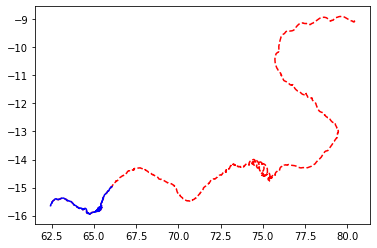

In [9]:
#iterate through id list, if last point is within reigon, save to list
#then iterate through ids that end within reigon
#plot trajectories that end within reigon
#1 month, 3 month, 6 month, 1 year trajectories

IDs=pd.unique(beach_drogued['ID']);

ind=beach_drogued['ID']==IDs[23];

traj_id=beach_drogued[ind]

latest_time=max(traj_id.time)

ind_time=(traj_id['time']>latest_time-60*60*24*30)

max_t=max(traj_id[ind_time]['time'])

traj_id[ traj_id['time']==max_t ].lat
traj_id[ traj_id['time']==max_t ].lon

plt.plot(traj_id.lon,traj_id.lat,'r--')

plt.plot(traj_id[ind_time].lon,traj_id[ind_time].lat,'b-')

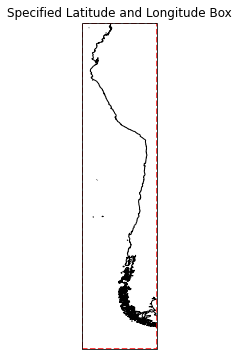

In [90]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the latitude and longitude ranges
min_lat, max_lat = -60, 5
min_lon, max_lon = -83, -68

# Create a figure and axis with Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map using the specified latitude and longitude ranges
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot the rectangle representing the specified area
ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], [min_lat, min_lat, max_lat, max_lat, min_lat],
        color='red', linestyle='--', transform=ccrs.PlateCarree())

# Add coastlines for context
ax.coastlines()

# Show the plot
plt.title('Specified Latitude and Longitude Box')
plt.show()


In [91]:
# Define the latitude and longitude range
min_lat, max_lat = -60, 5
min_lon, max_lon = -83, -68


# Initialize the set to store IDs within the region
points_within_region = set()

# Define the time threshold (in seconds) - for the last 6 months
#six_months = 6 * 30 * 24 * 60 * 60  # 6 months in seconds

# Iterate through each entry in 'beach_drogued_end_extract'
for entry in beach_drogued_end_extract:
    ID, lat, lon, _, _, time = entry
    
# Filter data for the last 30 days
    #ind_time = (traj_id['time'] > latest_time - 60 * 60 * 24 * 30)

    # Find the maximum time within the last 30 days
    #max_t = max(traj_id[ind_time]['time'])

    
    # Check if the ID is in the expected range
    if 0 <= ID <= 999999:
        # Check if the latitude and longitude are within the specified range
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon:
            # Check if the time is within the last 6 months
            #if time >= (current_time - six_months):
                # Add the ID to the set 'points_within_region'
            points_within_region.add(ID)

print(points_within_region)


{132610.0, 54276.0, 25615.0, 54290.0, 54293.0, 54299.0, 54301.0, 83487.0, 116268.0, 55342.0, 57904.0, 83509.0, 127032.0, 127033.0, 139837.0, 54364.0, 116318.0, 54369.0, 23152.0, 41077.0, 62581.0, 62593.0, 62597.0, 44174.0, 36505.0, 53410.0, 118443.0, 84147.0, 42679.0, 139962.0, 118459.0, 75454.0, 75457.0, 118465.0, 89794.0, 41668.0, 89797.0, 116424.0, 89801.0, 116426.0, 3275.0, 116429.0, 116430.0, 116431.0, 70867.0, 70880.0, 70882.0, 114918.0, 42727.0, 52967.0, 116456.0, 70896.0, 30457.0, 114942.0, 63743.0, 63746.0, 114947.0, 129284.0, 44293.0, 114949.0, 114950.0, 70933.0, 89882.0, 70944.0, 63779.0, 139566.0, 42808.0, 60223.0, 41281.0, 41283.0, 41287.0, 145735.0, 145737.0, 48982.0, 114532.0, 114535.0, 36202.0, 114539.0, 114540.0, 34167.0, 63882.0, 63889.0, 25498.0, 36252.0, 36253.0, 83367.0, 83371.0, 33196.0, 83372.0, 83381.0, 132534.0, 101815.0, 75194.0, 127418.0, 116166.0, 54219.0, 126938.0, 126939.0, 126940.0, 126941.0, 114654.0, 75231.0, 46051.0, 46053.0, 114661.0, 126955.0, 83438.

In [103]:
print("start")
latitudes = []
longitudes = []
earliest_points = []  # List to store earliest points
last_points = []  # List to store last points

# Convert the set to a list
points_list = list(points_within_region)

for ID in points_list:
    # Fetch the corresponding trajectory data for the ID
    traj_id = beach_drogued[beach_drogued['ID'] == ID]

    if not traj_id.empty:
        # Find the latest time for the ID
        latest_time = max(traj_id['time'])

        # Calculate the start time (6 months ago in Unix timestamp)
        start_time = latest_time - 15552000  # 6 months in seconds

        # Filter data within the last 6 months
        ind_time = (traj_id['time'] >= start_time) & (traj_id['time'] <= latest_time)

        # Filter the data
        latest_data = traj_id[ind_time]

        # Find the earliest time within the last 6 months
        earliest_point = latest_data[latest_data['time'] == min(latest_data['time'])]

        if not earliest_point.empty:
            earliest_points.append(earliest_point[['lat', 'lon']])

        # Find the last time point within the 6 months window
        last_point = latest_data[latest_data['time'] == max(latest_data['time'])]

        if not last_point.empty:
            last_points.append(last_point[['lat', 'lon']])

        # Extract latitudes and longitudes for the latest points
        for index, row in latest_data.iterrows():
            latitudes.append(row['lat'])
            longitudes.append(row['lon'])

print("finish")

start
finish


In [44]:
print(lat)

10881765   -12.50518
10881766   -12.50828
10881767   -12.50879
10881768   -12.50952
10881769   -12.51033
              ...   
10882776   -12.14426
10882777   -12.14353
10882778   -12.14483
10882779   -12.14542
10882780   -12.14580
Name: lat, Length: 1016, dtype: float64


Creating map...


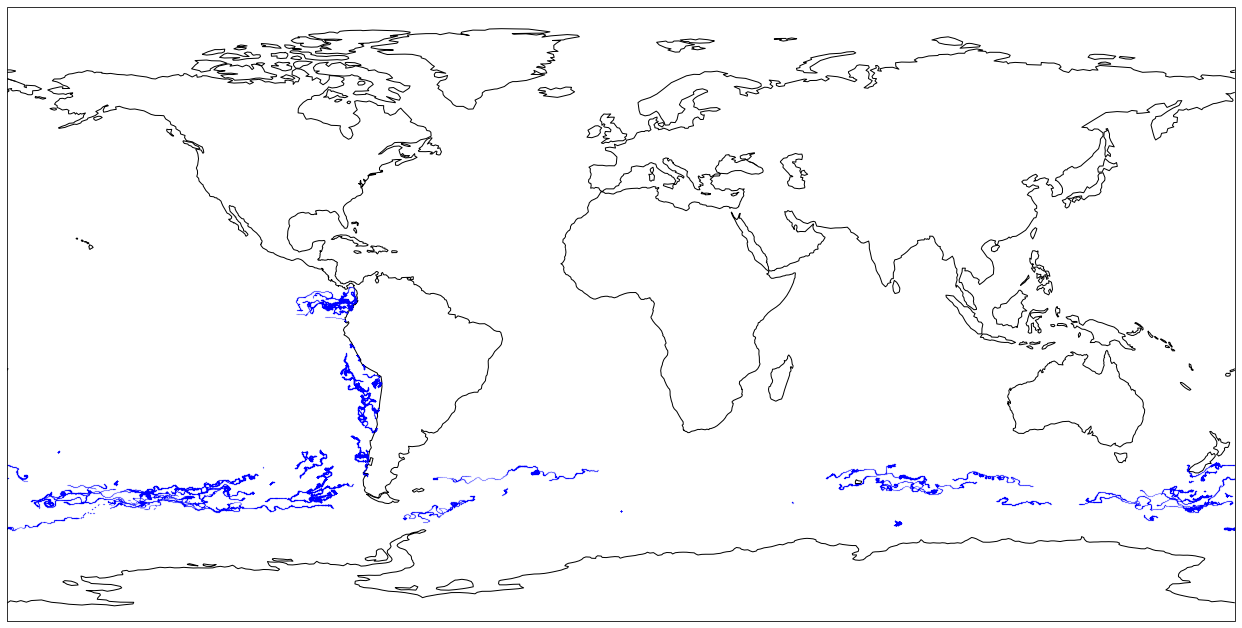

In [104]:
#create map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 10

plt.scatter(longitudes, latitudes, marker='o', color='blue', s=0.0005)

Creating map...


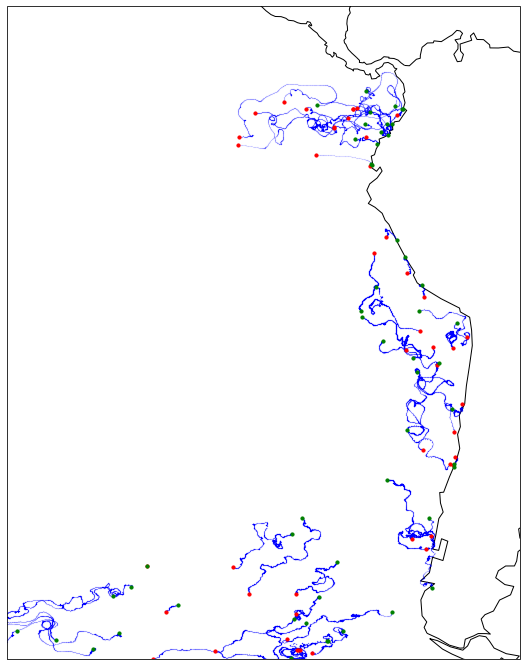

In [106]:
# Your existing code for creating the map
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-120, -65, -55, 15], crs=ccrs.PlateCarree())
ax.coastlines()

# Scatter plot for blue points
plt.scatter(longitudes, latitudes, marker='o', color='blue', s=0.0005)

# Plot red dots for the earliest points
for point in earliest_points:
    plt.scatter(point['lon'], point['lat'], color='red', s=10, marker='o')

# Plot green dots for the last points
for point in last_points:
    plt.scatter(point['lon'], point['lat'], color='green', s=10, marker='o')

plt.show()
